<font color = '#77A1BA' ><h1>DATA ANALYST SALARY PROJECT</h1></font>
<b><h5>JUNE 2021</h5></b>
<br></br>
<h3>PURPOSE</h3>

The purpose of this project is to analyze what factors such as sector, location, etc. from Glassdoor's job postings affect a Data Analyst's salary. My primary inspiration to start this project was to inform myself about the market trends of Data Analyst salary and in order to negotiate my salary at the event of a promotion at my current company to a Senior Data Analyst role. I want to explore the data by utilizing different charts, graphs, and summary statistics to visualize this dataset.

<h3>ACKNOWLEDGEMENTS</h3>

I downloaded my datatset from https://www.kaggle.com/andrewmvd/data-analyst-jobs and utilized some code and ideas from Ken Jee's github repo https://github.com/PlayingNumbers/ds_salary_proj

<h3>DATA EXPLORATION</h3>

This section includes data cleaning, data parsing, and exploratory data analysis. I created new calculated fields such as if a job description includes "Tableau" or "Excel" as a skill. I plotted various scatter and bar graphs with different fields and also tried to find variables that were highly correlated as well.

In [85]:
# import packages
import pandas as pd
import numpy as np
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [86]:
# import dataset
df = pd.read_csv("DataAnalyst.csv", header = 0)
df = df.drop(['Unnamed: 0'], axis = 1)

# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   object 
 1   Salary Estimate    2253 non-null   object 
 2   Job Description    2253 non-null   object 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   object 
 5   Location           2253 non-null   object 
 6   Headquarters       2253 non-null   object 
 7   Size               2253 non-null   object 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   object 
 10  Industry           2253 non-null   object 
 11  Sector             2253 non-null   object 
 12  Revenue            2253 non-null   object 
 13  Competitors        2253 non-null   object 
 14  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 264.1+ KB


In [87]:
print("There are {rows} jobs and {columns} job posting fields in the dataset".format(rows = df.shape[0], columns = df.shape[1]))

There are 2253 jobs and 15 job posting fields in the dataset


<h3>DATA ANALYSIS</h3>


In [88]:
# function to categorize jobs based on job title
def categorize_title(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "analyst" in title.lower():
        return "analyst"
    elif "engineer" in title.lower():
        return "engineer"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "n/a"

# function to categorize jobs based on seniority in title
def seniority(title):
    if "sr" in title.lower() or "lead" in title.lower() or "principal" in title.lower() or "senior" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "junior" in title.lower() or "entry" in title.lower():
        return "junior"
    else:
        return "n/a"
    
# function to create a filtered df without "-1" values
def filtered_df(data, column):
    data[column] = data[column].astype(str)
    new_df = data[data[column] != "-1"]
    return new_df

In [89]:
# rename columns
df.columns = [column.replace(" ", "_").lower() for column in df.columns]

# clean salary estimate
df["salary_estimate"] = df["salary_estimate"].str.partition(" (Glassdoor est.)")[0]
df["salary_estimate"] = df["salary_estimate"].str.replace("K", "000")
df["salary_estimate"] = df["salary_estimate"].str.replace("$", "")
df["lower"] = df["salary_estimate"].str.partition("-")[0]
df["upper"] = df["salary_estimate"].str.partition("-")[2]
df["average_sal"] = (pd.to_numeric(df["lower"]) + pd.to_numeric(df["upper"]))/2

# clean job description
df["job_description"] = df["job_description"].str.replace("\n", " ")

# clean company name
df["company_name"] = df["company_name"].str.partition("\n")[0]

# add state
df["state"] = df["location"].str.split(",", expand = True)[1]
df["state"] = df["state"].str.replace("Arapahoe", "CO")

# clean size
df["size"] = df["size"].str.replace("to", "-")
df["size"] = df["size"].str.replace("employees", "")

# state field
df["same_state"] = df.apply(lambda x: 1 if x.location == x.headquarters else 0, axis = 1)

# age of company
df["age_of_company"] = df["founded"].apply(lambda x: x if x < 0 else 2021 - x)

# key words
df['contains_sql'] = df["job_description"].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['contains_python'] = df["job_description"].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['contains_tableau'] = df["job_description"].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['contains_excel'] = df["job_description"].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['contains_aws'] = df["job_description"].apply(lambda x: 1 if 'aws' in x.lower() or 'amazon' in x.lower() else 0)

# job description length
df["job_desc_len"] = df["job_description"].apply(lambda x: len(x) if x != '-1' else 0)

# competitor count
df["num_comp"] = df["competitors"].apply(lambda x: len(x.split(",")) if x != '-1' else 0)

# job categories and seniority
df["categorized_title"] = df["job_title"].apply(categorize_title)
df["seniority"] = df["job_title"].apply(seniority)
df.head(5)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,age_of_company,contains_sql,contains_python,contains_tableau,contains_excel,contains_aws,job_desc_len,num_comp,categorized_title,seniority
0,"Data Analyst, Center on Immigration and Justic...",37000-66000,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 - 500,1961,Nonprofit Organization,...,60,1,1,0,0,1,7057,0,analyst,n/a
1,Quality Data Analyst,37000-66000,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+,1893,Nonprofit Organization,...,128,1,0,0,1,0,4702,0,analyst,n/a
2,"Senior Data Analyst, Insights & Analytics Team...",37000-66000,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 - 5000,2003,Company - Private,...,18,1,1,1,1,0,4688,1,analyst,senior
3,Data Analyst,37000-66000,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,"New York, NY","McLean, VA",201 - 500,2002,Subsidiary or Business Segment,...,19,1,0,1,0,1,5249,0,analyst,n/a
4,Reporting Data Analyst,37000-66000,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,"New York, NY","New York, NY",501 - 1000,2009,Company - Private,...,12,1,1,0,1,0,3376,1,analyst,n/a


<h3>CORRELATION MATRIX</h3>

I was first interested in what salaries depending on job titles, locations, and sector looked like. I also wanted to subset these jobs to strictly analyst roles, since that is my current position. Therefore, I will exclude the 14 job titles that are for "data scientist" in my analysis. I also wanted to explore any correlation between the numerical columns so I created a correlation matrix as well.

In [90]:
df.categorized_title.value_counts()

analyst           2239
data scientist      14
Name: categorized_title, dtype: int64

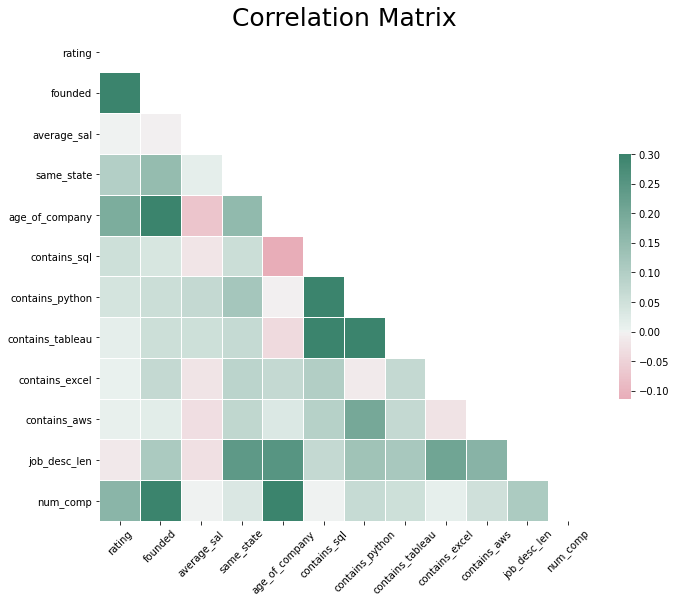

In [91]:
analyst_df = df.loc[df["categorized_title"] == "analyst"]

corr = analyst_df.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool))
f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(5, 160, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5})

plt.title("Correlation Matrix", fontsize = 25)
plt.xticks(rotation = 45);

<h4>INSIGHT</h4>

Some interesting insights that will guide the analysis of this project include:

1. There is a high correlation between SQL and Python, Tableau and SQL, and Python and Tableau. Since there are highly valuable skills as data anaylst, I would like to explore the different average salaries that come out for each skill.
2. There is a negative correlation between the age of the company and SQL and Tableau which can indicate a slower adoption of modern data technologies.

<h3>TOP SECTORS</h3>


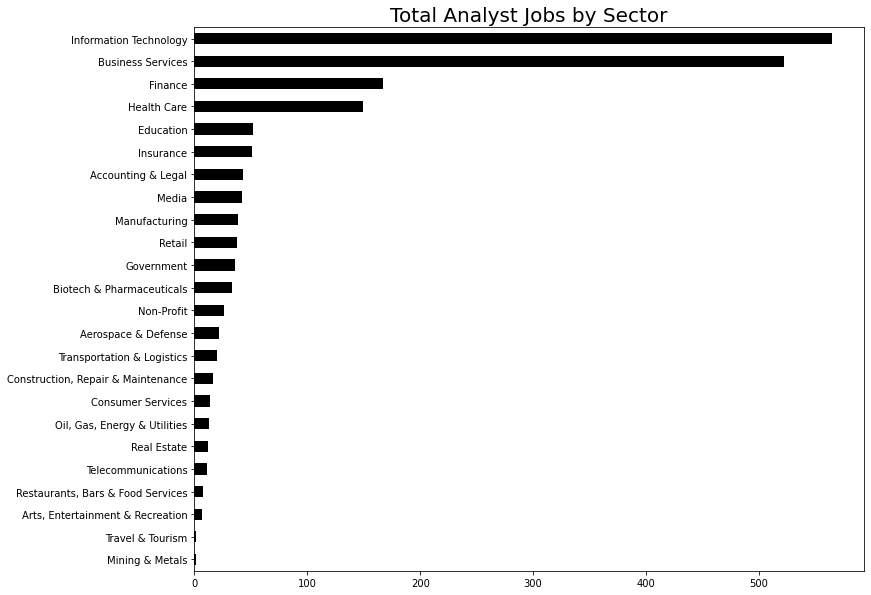

In [112]:
analyst_df = df[df["categorized_title"] == "analyst"]

filtered_df(analyst_df, "sector").sector.value_counts(ascending = True).plot(kind='barh', figsize=(12, 10), color = "black")
plt.title("Total Analyst Jobs by Sector", fontsize = 20);


<h4>INSIGHT</h4>

There were 4 dominant sectors from the dataset that I chose to dive into after seeing the top 4 most data analyst job postings from my dataset:

1. Information Technology (IT)
2. Business Services
3. Finance
4. Health Care

In [93]:
def top_4_salary_by_column(column_name):
    list_df = filtered_df(analyst_df, column_name)[column_name].value_counts().index.tolist()
    colors = ['red', 'blue', 'green', 'purple']

    # plot for analysts in top 4 sectors
    counter = 0
    for value in list_df:
        if counter < 4:
            column_df = analyst_df[analyst_df[column_name] == value]
            cleaned_df = filtered_df(column_df, "average_sal")
            cleaned_df["average_sal"] = cleaned_df["average_sal"].astype(float)

            mean = cleaned_df["average_sal"].mean()

            sns.distplot(cleaned_df["average_sal"], bins = 20, color = colors[counter])
            plt.axvline(mean, color = 'black', linestyle = "--", label = "Mean")
            plt.xlabel("Average Salary")
            plt.title(value, fontsize = 20)
            plt.show()
            print("The mean salary is ${:0,.2f}".format(round(mean, 2)))
            counter += 1

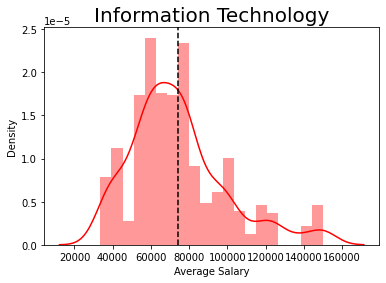

The mean salary is $74,007.96


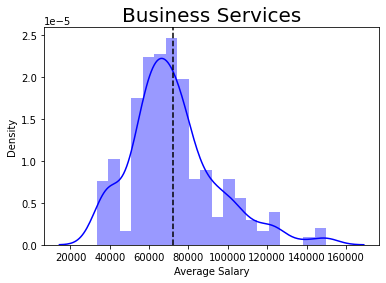

The mean salary is $72,285.03


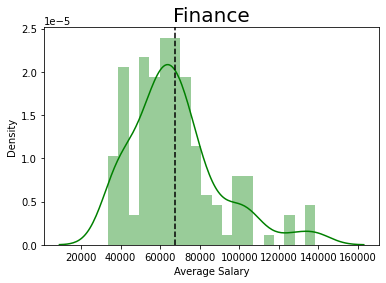

The mean salary is $67,559.88


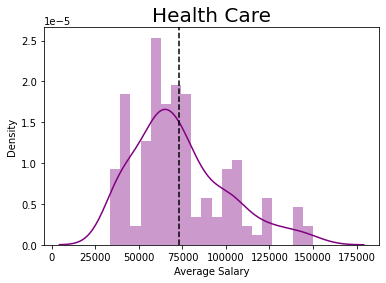

The mean salary is $73,248.32


In [95]:
top_4_salary_by_column("sector")

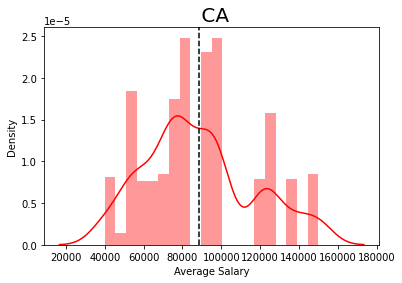

The mean salary is $88,284.11


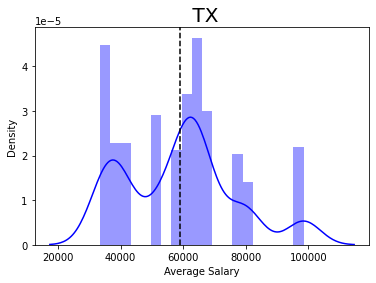

The mean salary is $58,905.37


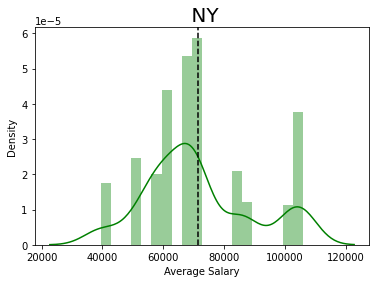

The mean salary is $71,408.16


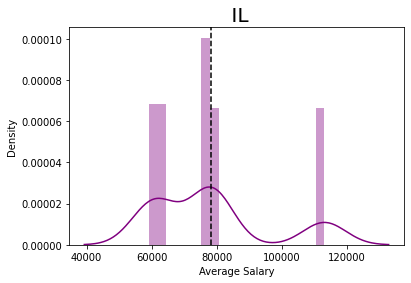

The mean salary is $78,101.85


In [94]:
top_4_salary_by_column("state")

<h4>INSIGHT</h4>

From the analysis of the 2 histograms above, I realized that I am at the industry mean salary for both the Healthcare sector and in NY state. For the next part of my analysis, I am interested in what a senior level analyst in similar sector and location would make. This will help with negotiating my salary at the end of year, during promotional periods.

<h3>SALARY BY SKILLS</h3>


In [96]:
# maybe make this an input where people can explore themselves

def compare_skills (skill, sector, seniority):
    # this function returns the average salary for a given sector based
    # on the top skills mentioned in the job description (tableau, sql, python, aws, excel)

    sector_df = analyst_df[(analyst_df["sector"] == sector) & (analyst_df["seniority"] == seniority)]
    
    with_skill_mean = sector_df[sector_df[skill] == 1]["average_sal"].mean()
    without_skill_mean = sector_df[sector_df[skill] == 0]["average_sal"].mean()
    
    print(sector)
    print("Salary for analyst in {} sector with {} skill: ${:0,.2f}".format(sector, skill, with_skill_mean))
    print("Salary for analyst in {} sector without {} skill: ${:0,.2f}".format(sector, skill, without_skill_mean))
    print("Difference in salary compared to having skill: ${:0,.2f}".format(with_skill_mean - without_skill_mean))
    print("-----")

In [105]:
compare_skills("contains_aws", "Health Care", "senior")
compare_skills("contains_excel", "Health Care", "senior")
compare_skills("contains_python", "Health Care", "senior")
compare_skills("contains_tableau", "Health Care", "senior")
compare_skills("contains_sql", "Health Care", "senior")

Health Care
Salary for analyst in Health Care sector with contains_aws skill: $74,250.00
Salary for analyst in Health Care sector without contains_aws skill: $78,230.77
Difference in salary compared to having skill: $-3,980.77
-----
Health Care
Salary for analyst in Health Care sector with contains_excel skill: $79,369.57
Salary for analyst in Health Care sector without contains_excel skill: $73,153.85
Difference in salary compared to having skill: $6,215.72
-----
Health Care
Salary for analyst in Health Care sector with contains_python skill: $75,944.44
Salary for analyst in Health Care sector without contains_python skill: $77,518.52
Difference in salary compared to having skill: $-1,574.07
-----
Health Care
Salary for analyst in Health Care sector with contains_tableau skill: $76,055.56
Salary for analyst in Health Care sector without contains_tableau skill: $78,194.44
Difference in salary compared to having skill: $-2,138.89
-----
Health Care
Salary for analyst in Health Care secto

<h4>INSIGHT</h4>

From the top 5 data analyst skills that I chose to focus on in the job descrpitions of my dataset, it seems like for a Senior Data Analyst, Excel and SQL are the only skills that will give you any benefit in a higher salary. It is interesting to note that Tableau, Python, and AWS skills actually give a decrease in salary. This is something that I would like to explore in a future project, but it seems to me that in analyst positions, you aren't doing much automation or building production code so Excel and SQL would be favored skills to have. Even in my job currently, I can fully function in my role only knowing Excel and Postgres. Since these 5 skills above are things I have and am working on, I can expect to negotiate maybe a 10-15% increase in my current salary.

In [98]:
senior_pivot = pd.pivot_table(analyst_df[(analyst_df.seniority == "senior") & (analyst_df.sector != "-1")],
                          values = ["average_sal"], index = ["sector"], aggfunc = np.mean)
senior_pivot.style.background_gradient(cmap = "Greens")

,average_sal
sector,
Accounting & Legal,73062.500000
Aerospace & Defense,50750.000000
"Arts, Entertainment & Recreation",150000.000000
Biotech & Pharmaceuticals,83375.000000
Business Services,75600.000000
"Construction, Repair & Maintenance",79500.000000
Consumer Services,50666.666667
Education,66857.142857
Finance,70690.909091


<h4>INSIGHT</h4>

This pivot table shows the average salary of Senior Data Analysts across all sectors in my dataset. Real Estate and Biotech have the highest salaries. I ignored the Arts, Entertainment & Recreation salary since there was only 1 datapoint and it wasn't significant enough for me to make a logical conclusion

<h4>FOR FUN</h4>

Lastly, continuing from the pivot table above. I took a look to see the salary differences for the top 5 sectors to see what the difference of having Excel or not was. Interestingly enough, the Education sector had a $9000 difference in salary. As a former summer school teacher and having many teacher friends, I was shocked by this result.

In [113]:
counter = 0

for sector in filtered_df(analyst_df, "sector")["sector"].value_counts().index.tolist():
    if counter < 5: 
        compare_skills("contains_excel", sector, "senior")
    counter += 1


Information Technology
Salary for analyst in Information Technology sector with contains_excel skill: $76,610.17
Salary for analyst in Information Technology sector without contains_excel skill: $77,516.95
Difference in salary compared to having skill: $-906.78
-----
Business Services
Salary for analyst in Business Services sector with contains_excel skill: $77,581.40
Salary for analyst in Business Services sector without contains_excel skill: $73,787.23
Difference in salary compared to having skill: $3,794.16
-----
Finance
Salary for analyst in Finance sector with contains_excel skill: $70,955.88
Salary for analyst in Finance sector without contains_excel skill: $70,261.90
Difference in salary compared to having skill: $693.98
-----
Health Care
Salary for analyst in Health Care sector with contains_excel skill: $79,369.57
Salary for analyst in Health Care sector without contains_excel skill: $73,153.85
Difference in salary compared to having skill: $6,215.72
-----
Education
Salary for

<h3>CONCLUSION</h3>

In conclusion, these are the key takeaways I had from this data project.

1. I am currently in the mean salary range for a entry level Analyst in New York working in the Health Care sector
2. There is around a $7000 increase in salary from a junior level to senior level analyst and having Excel was the greatest indicator of salary increase from my analysis. Given that I have this mastered as well as Tableau, SQL, and Python, I think a 10-15% ask in salary increase is reasonable.

In addition, some project limitations I would like to point out is as follows

1. There were only around 2300 data points, which is a relatively small sample size of the actual analyst roles out there. However, since I only wanted to explore what salaries were actually out there, this was helpful regardless.
2. This dataset was created a couple of years back through Glassdoor and as we know this is a fast-growing career field, the salaries could be slighlty different. I found it still helpful to see what the trends were a couple of years back and would like to do another project in the future to analyze jobs 5 years laters.